# 선형 회귀 (Linear Regression)

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## 보스턴 집값 예측 데이터 
각 데이터베이스의 레코드는 보스턴 교외 또는 마을을 설명한다.

이 데이터는 1970년 보스턴 표준 도시 통계 지역(SMSA)에서 수집되었다. (UCI ML Repositor에서 발췌):

- CRIM: 마을별 1인당 범죄율
- ZN: 25,000 평방피트를 초과하는 주거용 토지 비율
- INDUS: 비소매 업종이 차지하는 마을별 비율
- CHAS: 찰스강 더미 변수 (강과 인접한 지역이면 1, 아니면 0)
- NOX: 질소 산화물 농도 (1,000만분의 1 단위)
- RM: 주택당 평균 방 개수
- AGE: 1940년 이전에 지어진 자가 소유 주택 비율
- DIS: 보스턴 고용 센터 5곳까지의 가중 거리
- RAD: 방사형 고속도로 접근성 지수
- TAX: \$10,000당 전체 재산세율
- PTRATIO: 마을별 학생-교사 비율
- B: $1000(Bk−0.63)^2$ (여기서 Bk는 마을별 흑인 비율)
- LSTAT: 저소득층 인구 비율
- MEDV: (타겟) Median House Value 자가 소유 주택의 중앙값 (단위: \$1000s)

In [ ]:
boston_df = pd.read_csv('./data/boston_housing_train.csv')
boston_df

In [ ]:
boston_df.info()

In [ ]:
boston_df.describe()

In [ ]:
fig, ax = plt.subplots(figsize=(16, 10), ncols=5, nrows=3)

columns = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']

for i, col_name in enumerate(columns):
    row = i // 5
    col = i % 5
    ax_temp = ax[row][col]

    # sns.scatterplot(data=boston_df, x=col_name, y='MEDV', ax=ax_temp)
    sns.regplot(data=boston_df, x=col_name, y='MEDV', ax=ax_temp)

### 다중회귀

In [ ]:
from sklearn.model_selection import train_test_split

# 입력-라벨 데이터 분리
X = boston_df.drop('MEDV', axis=1)
y = boston_df['MEDV']

# 학습-테스트 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [ ]:
from sklearn.linear_model import LinearRegression

# 모델 학습
lr = LinearRegression()
lr.fit(X_train, y_train)

In [ ]:
# 평가: score() -> 기본 평가 지표 R^2 (결정계수)
lr.score(X_train, y_train), lr.score(X_test, y_test)

In [ ]:
# 예측
y_pred = lr.predict(X_test)

In [ ]:
# 다른 평가 지표
from sklearn.metrics import mean_squared_error, root_mean_squared_error, mean_absolute_error, r2_score

def evaluate_regression(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    rmse = root_mean_squared_error(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)

    print(f'MSE: { mse }, RMSE: { rmse }, MAE: { mae }, R2: { r2 }')

In [ ]:
evaluate_regression(y_test, y_pred)

In [ ]:
print(boston_df.columns)
print(lr.coef_)             # 회귀계수
print(lr.intercept_)        # 절편

### 다항회귀

- 회귀식 선형이 아닌 2차, 3차 방정식으로 표현되는 회귀 기법

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(include_bias=False)    # degree=2
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

print(X_train.shape, X_train_poly.shape, X_test.shape, X_test_poly.shape)
poly.get_feature_names_out()

In [ ]:
# 학습
lr_poly = LinearRegression()
lr_poly.fit(X_train_poly, y_train)

In [ ]:
# 평가
lr_poly.score(X_train_poly, y_train), lr_poly.score(X_test_poly, y_test)

In [ ]:
# 예측 -> 평가지표 확인
y_pred = lr_poly.predict(X_test_poly)
evaluate_regression(y_test, y_pred)

### 과대적합/과소적합

https://scikit-learn.org/stable/auto_examples/model_selection/plot_underfitting_overfitting.html

### 캘리포니아 집값 예측해보기

**California Housing Dataset**는 머신러닝과 데이터 분석에서 자주 사용되는 데이터셋으로, 1990년 미국 캘리포니아 주의 인구 조사를 기반으로 수집된 주택 관련 데이터이다. 이 데이터셋은 캘리포니아 내의 블록 그룹(block group)을 나타내며, 각 레코드는 하나의 블록 그룹을 의미한다. 블록 그룹은 미국 인구 조사국에서 표본 데이터를 제공하는 가장 작은 지리적 단위이다.
- 데이터셋은 **20,640개의 레코드**로 구성되어 있다.
- **회귀 모델링**: 주택 가격 예측.
- **탐색적 데이터 분석(EDA)**: 주택 특징 간의 관계 분석.
- **특징 엔지니어링 및 선택**: 영향력 있는 특징 도출.


**특징**

1. **MedInc**: 블록 그룹 내의 중간 소득 (단위: 만 달러).
2. **HouseAge**: 블록 그룹 내의 중간 주택 연수.
3. **AveRooms**: 블록 그룹 내 가구당 평균 방 수.
4. **AveBedrms**: 블록 그룹 내 가구당 평균 침실 수.
5. **Population**: 블록 그룹 내 인구 수.
6. **AveOccup**: 블록 그룹 내 가구당 평균 거주자 수.
7. **Latitude**: 블록 그룹의 위도.
8. **Longitude**: 블록 그룹의 경도.

**목표 변수**

- **MedHouseVal**: 블록 그룹 내 가구의 중간 주택 가치 (단위: 만 달러).

In [45]:
# 캘리포니아 집값 데이터 로드
from sklearn.datasets import fetch_california_housing

# fetch_california_housing()

In [50]:
# DataFrame 생성 -> 구조, 기초 통계 확인
california_data = fetch_california_housing()

california_df = pd.DataFrame(california_data.data, columns=california_data.feature_names)

# print(california_data.keys())
# print(california_data.target_names)

california_df[california_data.target_names[0]] = california_data.target

california_df.info()
california_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


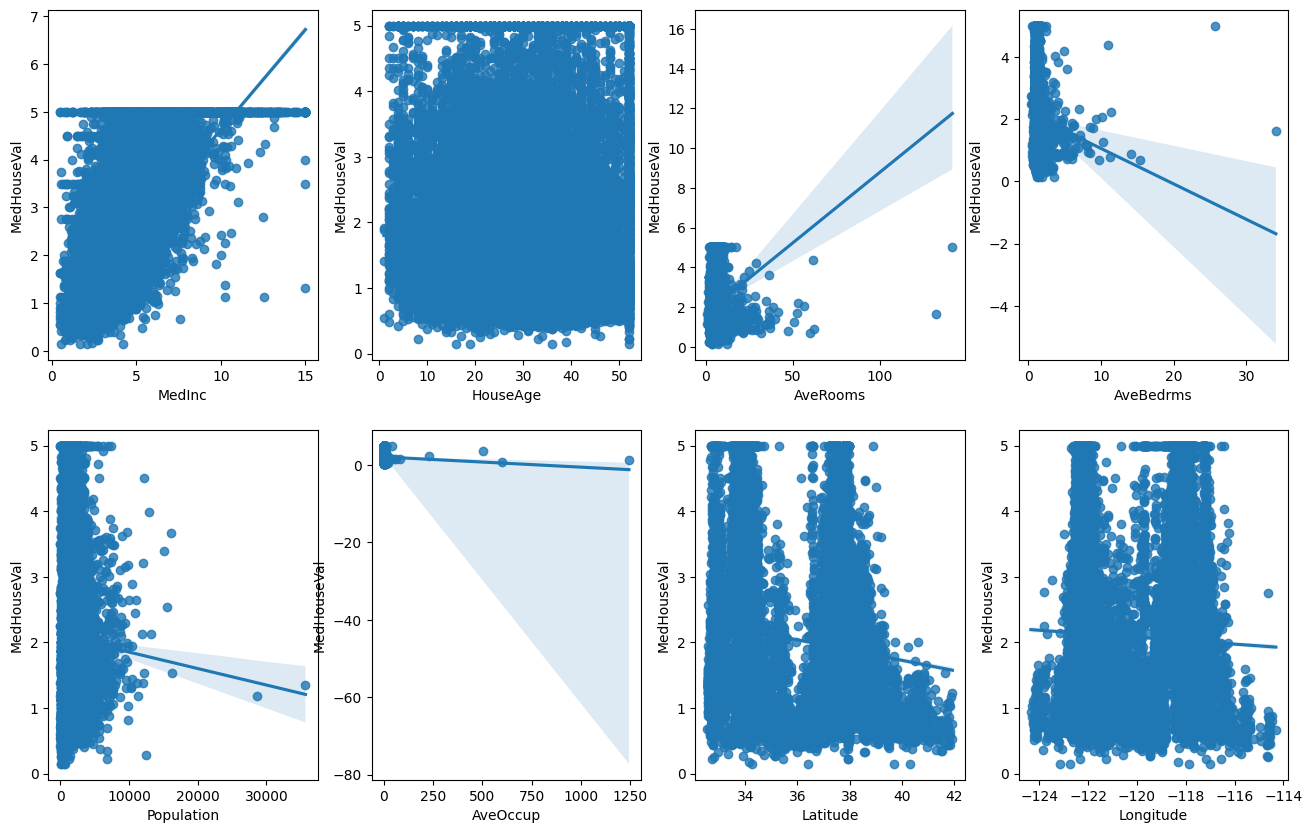

In [51]:
# 데이터 시각화 -> 특성 확인 (보스톤 집값 데이터 시각화 참고)
fig, ax = plt.subplots(figsize=(16, 10), ncols=4, nrows=2)
columns = ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']

for i, col_name in enumerate(columns):
    row = i // 4
    col = i % 4
    ax_temp = ax[row][col]

    sns.regplot(data=california_df, x=col_name, y='MedHouseVal', ax=ax_temp)

In [55]:
X = california_df.drop('MedHouseVal', axis=1)
y = california_df['MedHouseVal']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [56]:
# 다중회귀 (훈련, 평가, 다른 평가 지표들로 평가)
# 훈련
lr = LinearRegression()
lr.fit(X_train, y_train)

# 평가
lr.score(X_train, y_train), lr.score(X_test, y_test)

(0.609873031052925, 0.5910509795491354)

In [57]:
y_pred = lr.predict(X_test)
evaluate_regression(y_test, y_pred)

MSE: 0.5411287478470685, RMSE: 0.7356145375446766, MAE: 0.5296964012919458, R2: 0.5910509795491354


In [58]:
# 다항회귀 (훈련, 평가, 다른 평가 지표들로 평가)
poly = PolynomialFeatures(include_bias=False)  # degree=2
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

print(X_train.shape, X_train_poly.shape, X_test.shape, X_test_poly.shape)
poly.get_feature_names_out()

(15480, 8) (15480, 44) (5160, 8) (5160, 44)


array(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population',
       'AveOccup', 'Latitude', 'Longitude', 'MedInc^2', 'MedInc HouseAge',
       'MedInc AveRooms', 'MedInc AveBedrms', 'MedInc Population',
       'MedInc AveOccup', 'MedInc Latitude', 'MedInc Longitude',
       'HouseAge^2', 'HouseAge AveRooms', 'HouseAge AveBedrms',
       'HouseAge Population', 'HouseAge AveOccup', 'HouseAge Latitude',
       'HouseAge Longitude', 'AveRooms^2', 'AveRooms AveBedrms',
       'AveRooms Population', 'AveRooms AveOccup', 'AveRooms Latitude',
       'AveRooms Longitude', 'AveBedrms^2', 'AveBedrms Population',
       'AveBedrms AveOccup', 'AveBedrms Latitude', 'AveBedrms Longitude',
       'Population^2', 'Population AveOccup', 'Population Latitude',
       'Population Longitude', 'AveOccup^2', 'AveOccup Latitude',
       'AveOccup Longitude', 'Latitude^2', 'Latitude Longitude',
       'Longitude^2'], dtype=object)

In [60]:
# 학습
lr_poly = LinearRegression()
lr_poly.fit(X_train_poly, y_train)

# 평가
print(lr_poly.score(X_train_poly, y_train), lr_poly.score(X_test_poly, y_test))

# 예측 -> 평가지표 확인
y_pred = lr_poly.predict(X_test_poly)
evaluate_regression(y_test, y_pred)

0.6829089327528398 0.6563005879298475
MSE: 0.45478928469921964, RMSE: 0.6743806675010929, MAE: 0.4646020777049507, R2: 0.6563005879298475
